In [1]:
!nvidia-smi

Wed May 31 12:59:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
cd '/content'

/content


In [5]:
!unzip "drive/MyDrive/Brainhack/Train.zip" -d "train_images"

!unzip "drive/MyDrive/Brainhack/train_labels.zip" -d "train_labels"

!unzip "drive/MyDrive/Brainhack/Validation.zip" -d "val_images"

!unzip "drive/MyDrive/Brainhack/val_labels.zip" -d "val_labels"

!unzip "drive/MyDrive/Brainhack/Test.zip" -d "test_images"

!unzip "drive/MyDrive/Brainhack/suspects.zip" -d "suspects"

Streaming output truncated to the last 5000 lines.
 extracting: train_labels/image_0460.txt  
 extracting: train_labels/image_0479.txt  
 extracting: train_labels/image_0465.txt  
 extracting: train_labels/image_0475.txt  
 extracting: train_labels/image_0477.txt  
 extracting: train_labels/image_0474.txt  
 extracting: train_labels/image_0457.txt  
 extracting: train_labels/image_0473.txt  
 extracting: train_labels/image_0472.txt  
 extracting: train_labels/image_0466.txt  
 extracting: train_labels/image_0481.txt  
 extracting: train_labels/image_0471.txt  
 extracting: train_labels/image_0469.txt  
 extracting: train_labels/image_0484.txt  
 extracting: train_labels/image_0482.txt  
 extracting: train_labels/image_0459.txt  
 extracting: train_labels/image_0476.txt  
 extracting: train_labels/image_0468.txt  
 extracting: train_labels/image_0489.txt  
 extracting: train_labels/image_0505.txt  
 extracting: train_labels/image_0494.txt  
 extracting: train_labels/image_0495.txt  
 ex

In [6]:
train_images_path = '/content/train_images'
train_labels_path = '/content/train_labels'
val_images_path = '/content/val_images'
val_labels_path = '/content/val_labels'

In [7]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import os

train_crops_path = "train_crops"
num_plushies = 200
os.mkdir(train_crops_path)

for i in range(num_plushies):
    os.mkdir(os.path.join(train_crops_path, str(i)))

In [9]:
val_crops_path = "val_crops"
num_plushies = 10
os.mkdir(val_crops_path)

for i in range(num_plushies):
    os.mkdir(os.path.join(val_crops_path, str(i)))

# Crop the plushie from images using bounding boxes


In [10]:
import cv2
import numpy as np
import pandas as pd
import os

images_path = train_images_path
labels_path = train_labels_path
annotated_images_path = train_crops_path


for label_name in os.listdir(labels_path):
    if label_name[-4:] != ".txt":
        continue
    image_name = label_name[:-4] + ".png"
    # print("Checking", image_name)

    image_path = os.path.join(images_path, image_name)
    label_path = os.path.join(labels_path, label_name)

    df = pd.read_csv(label_path, delim_whitespace=True, header=None)
    df.columns = ["cat", "xc", "yc", "w", "h"]

    img = cv2.imread(image_path)
    img_h, img_w = img.shape[:2]

    for i in range(df.shape[0]):
        bb = df.iloc[i]
        cat = str(int(bb["cat"]))
        tl = (int((bb["xc"] - bb["w"]/2) * img_w), int((bb["yc"] - bb["h"]/2) * img_h))
        br = (int((bb["xc"] + bb["w"]/2) * img_w), int((bb["yc"] + bb["h"]/2) * img_h))

        cropped_img = img[tl[1]:br[1], tl[0]:br[0]]
        annotated_img_name = f"{cat}_{len(os.listdir(os.path.join(annotated_images_path, cat)))}.png"
        cv2.imwrite(os.path.join(annotated_images_path, cat, annotated_img_name), cropped_img)


In [11]:
import cv2
import numpy as np
import pandas as pd
import os

images_path = val_images_path
labels_path = val_labels_path
annotated_images_path = val_crops_path


for label_name in os.listdir(labels_path):
    if label_name[-4:] != ".txt":
        continue
    image_name = label_name[:-4] + ".png"
#     print("Checking", image_name)

    image_path = os.path.join(images_path, image_name)
    label_path = os.path.join(labels_path, label_name)

    df = pd.read_csv(label_path, delim_whitespace=True, header=None)
    df.columns = ["cat", "xc", "yc", "w", "h"]

    img = cv2.imread(image_path)
    img_h, img_w = img.shape[:2]

    for i in range(df.shape[0]):
        bb = df.iloc[i]
        cat = str(int(bb["cat"]))
        tl = (int((bb["xc"] - bb["w"]/2) * img_w), int((bb["yc"] - bb["h"]/2) * img_h))
        br = (int((bb["xc"] + bb["w"]/2) * img_w), int((bb["yc"] + bb["h"]/2) * img_h))

        cropped_img = img[tl[1]:br[1], tl[0]:br[0]]
        annotated_img_name = f"{cat}_{len(os.listdir(os.path.join(annotated_images_path, cat)))}.png"
        cv2.imwrite(os.path.join(annotated_images_path, cat, annotated_img_name), cropped_img)


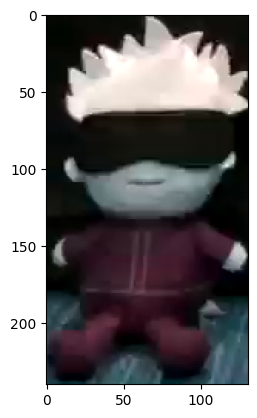

In [12]:
image = cv2.imread(f'{train_crops_path}/0/0_22.png')
plt.imshow(image)

# Creating LFW file format for labelling matches and mismatches

In [35]:
os.chdir('/content')

In [36]:
import os
import random

counts = {}

crops_path = train_crops_path
num_plushies = 200

for i in range(num_plushies):
    counts[i] = len(os.listdir(os.path.join(crops_path, str(i))))
print(counts)

lines = []

def add_match(plushie, num1, num2):
    line = f"{plushie} {num1} {num2}\n"
    lines.append(line)

def add_mismatch(plushie1, num1, plushie2, num2):
    line = f"{plushie1} {num1} {plushie2} {num2}\n"
    lines.append(line)

#hyperparameter
len_data = 100000

for i in range(len_data):
    # print(i)
    plushie = random.choice(list(counts.keys()))

    num1, num2 = random.randrange(counts[plushie]), random.randrange(counts[plushie])

    while not (os.path.exists(f"{crops_path}/{plushie}/{plushie}_{num1}.png") and os.path.exists(f"{crops_path}/{plushie}/{plushie}_{num2}.png")):
        print(num1, num2, plushie)
        num1, num2 = random.randrange(counts[plushie]), random.randrange(counts[plushie])
    
    add_match(plushie, num1, num2)

for i in range(len_data):
    # print(i)
    plushie1, plushie2 = random.choice(list(counts.keys())), random.choice(list(counts.keys()))
    while plushie1 == plushie2:
        plushie1, plushie2 = random.choice(list(counts.keys())), random.choice(list(counts.keys()))

    num1, num2 = random.randrange(counts[plushie1]), random.randrange(counts[plushie2])
                              
                              
    while not (os.path.exists(f"{crops_path}/{plushie1}/{plushie1}_{num1}.png") and os.path.exists(f"{crops_path}/{plushie2}/{plushie2}_{num2}.png")):
        num1, num2 = random.randrange(counts[plushie1]), random.randrange(counts[plushie2])

    add_mismatch(plushie1, num1, plushie2, num2)


f = open("plushie_pairs_train.txt", "a")
f.writelines(lines)
f.close()

{0: 67, 1: 65, 2: 66, 3: 65, 4: 65, 5: 65, 6: 61, 7: 66, 8: 66, 9: 64, 10: 66, 11: 65, 12: 65, 13: 64, 14: 66, 15: 65, 16: 66, 17: 65, 18: 66, 19: 65, 20: 65, 21: 66, 22: 65, 23: 66, 24: 65, 25: 65, 26: 65, 27: 65, 28: 64, 29: 65, 30: 65, 31: 65, 32: 65, 33: 66, 34: 66, 35: 65, 36: 65, 37: 65, 38: 65, 39: 65, 40: 65, 41: 64, 42: 65, 43: 65, 44: 66, 45: 65, 46: 66, 47: 63, 48: 66, 49: 65, 50: 65, 51: 65, 52: 64, 53: 66, 54: 65, 55: 66, 56: 66, 57: 65, 58: 65, 59: 65, 60: 65, 61: 63, 62: 65, 63: 64, 64: 65, 65: 65, 66: 66, 67: 66, 68: 65, 69: 65, 70: 66, 71: 66, 72: 66, 73: 65, 74: 63, 75: 64, 76: 65, 77: 65, 78: 65, 79: 63, 80: 63, 81: 64, 82: 64, 83: 63, 84: 64, 85: 64, 86: 64, 87: 56, 88: 56, 89: 56, 90: 58, 91: 62, 92: 62, 93: 58, 94: 65, 95: 63, 96: 57, 97: 61, 98: 61, 99: 56, 100: 60, 101: 56, 102: 61, 103: 60, 104: 57, 105: 61, 106: 60, 107: 54, 108: 57, 109: 59, 110: 60, 111: 56, 112: 57, 113: 60, 114: 55, 115: 56, 116: 56, 117: 61, 118: 57, 119: 57, 120: 57, 121: 56, 122: 56, 12

In [37]:
import os
import random

counts = {}

crops_path = val_crops_path
num_plushies = 10

for i in range(num_plushies):
    counts[i] = len(os.listdir(os.path.join(crops_path, str(i))))
print(counts)

lines = []

def add_match(plushie, num1, num2):
    line = f"{plushie} {num1} {num2}\n"
    lines.append(line)

def add_mismatch(plushie1, num1, plushie2, num2):
    line = f"{plushie1} {num1} {plushie2} {num2}\n"
    lines.append(line)

len_data = 4000

for i in range(len_data):
    # print(i)
    plushie = random.choice(list(counts.keys()))

    num1, num2 = random.randrange(counts[plushie]), random.randrange(counts[plushie])

    while not (os.path.exists(f"{crops_path}/{plushie}/{plushie}_{num1}.png") and os.path.exists(f"{crops_path}/{plushie}/{plushie}_{num2}.png")):
        print(num1, num2, plushie)
        num1, num2 = random.randrange(counts[plushie]), random.randrange(counts[plushie])
    
    add_match(plushie, num1, num2)

for i in range(len_data):
    # print(i)
    plushie1, plushie2 = random.choice(list(counts.keys())), random.choice(list(counts.keys()))
    while plushie1 == plushie2:
        plushie1, plushie2 = random.choice(list(counts.keys())), random.choice(list(counts.keys()))

    num1, num2 = random.randrange(counts[plushie1]), random.randrange(counts[plushie2])
                              
                              
    while not (os.path.exists(f"{crops_path}/{plushie1}/{plushie1}_{num1}.png") and os.path.exists(f"{crops_path}/{plushie2}/{plushie2}_{num2}.png")):
        num1, num2 = random.randrange(counts[plushie1]), random.randrange(counts[plushie2])

    add_mismatch(plushie1, num1, plushie2, num2)


f = open("plushie_pairs_val.txt", "a")
f.writelines(lines)
f.close()

{0: 179, 1: 177, 2: 169, 3: 163, 4: 163, 5: 163, 6: 166, 7: 169, 8: 173, 9: 177}


# Helper Function

In [15]:
import torch
import matplotlib.pyplot as plt

def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
    
def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def show_img(img1, img2):
    axs = plt.figure(figsize=(9, 9)).subplots(1, 2)
    axs[0].imshow(img1)
    axs[1].imshow(img2)


def accuracy(preds, labels):
    preds = torch.flatten(preds)
    return torch.sum(preds == labels).item() / len(labels)


class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)
    
    def __len__(self):
        return len(self.dl)

# Transforming the Data
Resizing the images and preprocessing

In [16]:
import torchvision.transforms as tt
import cv2

class BGR2RGB:
    def __call__(self, image):
        #image = image.numpy()
        #print(f'type of image {type(image)}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image = torch.from_numpy(image)
        return image

class SquarePad:
    def __call__(self, image):
        max_wh = max(image.shape[:2])
        p_left, p_top = [(max_wh - s) // 2 for s in image.shape[:2]]
        p_right, p_bottom = [max_wh - (s+pad) for s, pad in zip(image.shape[:2], [p_left, p_top])]
        return cv2.copyMakeBorder(image, p_top, p_bottom, p_left, p_right, cv2.BORDER_CONSTANT, None, value = 0)


class Resize():
    def __init__(self, output_size=(128, 128)):
        assert isinstance(output_size, (tuple))
        self.output_size = output_size

    def __call__(self, image):
        return cv2.resize(image, self.output_size, interpolation = cv2.INTER_LINEAR)

class Transforms:
    def __init__(self):
        self.transform = tt.Compose([BGR2RGB(), 
                        SquarePad(),
                        Resize((128, 128)),
                        tt.ToTensor(),
                        tt.Normalize(0, 0.5)])

    def __call__(self, image):
        return self.transform(image)
    

In [17]:
from torchvision.models import resnet50, ResNet50_Weights
from torch import cat
import torch.nn as nn

class SiameseNetwork(nn.Module):
    """
        https://github.com/pytorch/examples/tree/main/siamese_network

        BCE Loss
    """
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        self.resnet = resnet50(ResNet50_Weights.DEFAULT)

        for ct, child in enumerate(self.resnet.children()):
            if ct < 6:
                for param in child.parameters():
                    param.requires_grad = False


        self.fc_in_features = self.resnet.fc.in_features
        
        # remove the last layer of resnet18 (linear layer which is before avgpool layer)
        self.resnet = nn.Sequential(*(list(self.resnet.children())[:-1]))

        # add linear layers to compare between the features of the two images
        self.fc = nn.Sequential(
            nn.Linear(self.fc_in_features, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),

            nn.Linear(1024, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.3),
            nn.Linear(256, 1) #MIGHT WANT A MORE COMPLEX VECTOR OUTPUT
        )


    def get_embeddings(self, x):
        output = self.resnet(x)
        output = output.view(output.size()[0], -1)
        return output

    def forward(self, input1, input2):
        output1 = self.get_embeddings(input1)
        output1 = self.fc(output1)
        output2 = self.get_embeddings(input2)
        output2 = self.fc(output2)
        #output = cat((output1, output2), 1)
        #output = self.fc(output) #the output of the Siamese Network is a number;
        
        #return output
        return output1, output2

In [18]:
import os
import matplotlib.pyplot as plt

from PIL import Image
import cv2

from torch.utils.data import Dataset




class PlushieTrainDataset(Dataset):
    
    def __init__(self, filepath, img_dir, transform=None):
        self.samples = []
        self.img_dir = img_dir
        self.transform = transform

        with open(filepath, 'r') as f:
            self.samples = [line.strip() for line in f]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, i):
        line = self.samples[i].split()
        if len(line) == 3:
            anchor_name, anchor_num, img_num = line
            img_name = anchor_name
            is_same = 1
        elif len(line) == 4:
            anchor_name, anchor_num, img_name, img_num = line
            is_same = 0
        else:
            print(len(line), line)
            raise Exception("Shouldn't be here")
        
        anchor = cv2.imread(os.path.join(self.img_dir, str(anchor_name), f"{anchor_name}_{anchor_num}.png"))
        img = cv2.imread(os.path.join(self.img_dir, img_name, f"{img_name}_{img_num}.png"))
        
        if self.transform:
            anchor = self.transform(anchor)
            img = self.transform(img)

        return anchor, img, is_same



In [ ]:
import numpy as np
import torch
import torch.nn.functional as F

def infer(model, img, target, transform = None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    #print(f'type of img: {type(img)}')
    #print(f'shape of output1 {img.shape} and output2 {target.shape}')
    if transform is not None:
      output1, output2 = transform(img).unsqueeze(0), transform(target).unsqueeze(0)
    else:
      output1, output2 = img, target
    #generate the embedding vectors using loaded model
    #print(f'after transform: shape of output1 {output1.shape} and output2 {output2.shape}') #SHOULD GET (256,3,128,128)
    output1,output2 = model(output1.to(device),output2.to(device)) 
    #print(f'after model: shape of output1 {output1.shape} and output2 {output2.shape}')
    #calculating euclidean distance and determining if match
    euclidean_distance = F.pairwise_distance(output1, output2)
    #print(f'euclidean disatnce {euclidean_distance}')
    pred = torch.Tensor(np.array([1 if dist < 1 else 0 for dist in euclidean_distance]))
    #pred = (1 if abs(euclidean_distance) < 1 else 0) #1 for suspect, 0 for non-suspect
    #print(f'prediciton {pred}')
    return pred, euclidean_distance



def loss_batch(model, loss_func, anchor, image, label, opt=None, metric=None): # Update model weights and return metrics given xb, yb, model
    #ANCHOR SHAPE IS (256,3,128,128)
    preds = model(anchor, image) #RETURNS (2, 256) -> EACH DATA HAS ONE INTEGER OUTPUT
    #print(f'model prediction {preds[0].shape} and {preds[1].shape}')
    loss = loss_func(preds[0], preds[1], label.unsqueeze(1).float()) #the loss function compares the output number of the network to the label #made a change here
    # loss = loss_func(preds, label.unsqueeze(1).float())
    #print(f'anchor cpu{anchor.cpu().numpy()}')
    result, _ = infer(model, anchor, image, None) #ISSUE -> RESULT IS AN INTEGER, MIGHT BE DUE TO NUMPY CONVERSION
    result = result.cuda()
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        #print(f'results {result}') #ISSUE WITH RESULT -> RESULT IS AN INTEGER
        metric_result = metric(result, label)
        
    return loss.item(), len(anchor), metric_result


def fit(epochs, model, loss_func, train_dl, val_dl, opt_func=torch.optim.SGD, lr=0.01, metric=None):
    train_losses, val_losses, val_metrics = [] , [], []
    
    opt = opt_func(model.parameters(), lr=lr)
    
    for epoch in range(1, epochs+1):
        model.train() # Setting for pytorch - training mode
        for anchor,image,label in train_dl:
            #print(f'anchor type {type(anchor)}')
            #print(f'train_dl label shape {label.shape}') # Checking the label shape
            #print(f'anchor shape {anchor.shape}')
            train_loss, _, _ = loss_batch(model, loss_func, anchor, image, label, opt) # update weights
            train_losses.append(train_loss)
            print(f'train loss{train_loss}')
            
        model.eval() # Setting - eval mode
        val_loss, total, val_metric = evaluate(model, loss_func, val_dl, metric)
        
        
        val_losses.append(val_loss)
        val_metrics.append(val_metric)
        
        if metric is None:
            print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}".format(
            epoch, train_loss, val_loss))
        else:
            print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_{}: {:.4f}".format(
            epoch, train_loss, val_loss, metric.__name__, val_metric))
            
    return train_losses, val_losses, val_metrics


def evaluate(model, loss_func, val_dl, metric=None):
    with torch.no_grad():
        results = [loss_batch(model, loss_func, anchor, image, label, metric=metric) for anchor, image, label in val_dl]
        
        losses, nums, metrics = zip(*results)
        total = np.sum(nums)
        
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
            
        print(f'validation loss {avg_loss}')
        
        return avg_loss, total, avg_metric



train_filepath = "plushie_pairs_train.txt"
train_img_dir = train_crops_path
val_filepath = "plushie_pairs_val.txt"
val_img_dir = val_crops_path
train_bs = 256
test_bs = 8
num_epochs = 5
lr = 0.0001

torch.autograd.set_detect_anomaly(True)

transform = Transforms()
train_dataset = PlushieTrainDataset(filepath=train_filepath, img_dir=train_img_dir, transform=transform)
valid_dataset = PlushieTrainDataset(filepath=val_filepath, img_dir=val_img_dir, transform=transform)
network = SiameseNetwork()


print("The length of Train set is {}".format(len(train_dataset)))
print("The length of Valid set is {}".format(len(valid_dataset)))

train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=train_bs, shuffle=True, num_workers=4)
val_dl = torch.utils.data.DataLoader(valid_dataset, batch_size=test_bs, shuffle=True, num_workers=4)

device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(network, device)

class ContrastiveLoss(nn.Module):
    def __init__(self, margin=2.0):
        super(ContrastiveLoss, self).__init__()
        self.margin = margin

    def forward(self, output1, output2, label):
        euclidean_distance = F.pairwise_distance(output1, output2)
        #print(f'euclidean dist shape {euclidean_distance.shape}')
        loss_contrastive = torch.mean((label) * 0.5 * torch.pow(euclidean_distance, 2) +
                                      (1 - label) * 0.5 * torch.pow(torch.clamp(self.margin - euclidean_distance, min=0.0), 2))
        #print(f'cont loss shape {loss_contrastive.shape}')
        return loss_contrastive

#criterion = torch.nn.BCEWithLogitsLoss()
criterion = ContrastiveLoss()
optimizer = torch.optim.Adam


train_losses, val_losses, val_metrics = fit(num_epochs, network, criterion, 
                                        train_dl, val_dl, optimizer, lr, accuracy)

torch.save(network.state_dict(), '/content/drive/MyDrive/Brainhack/reid2_model.pt')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


The length of Train set is 220000
The length of Valid set is 8800


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


train loss1.0208708047866821
train loss0.8026964068412781
train loss0.9821345806121826
train loss0.9910008907318115
train loss0.8615889549255371
train loss0.8358803987503052
train loss0.9298862814903259
train loss0.8257873058319092
train loss0.8619333505630493
train loss0.8269936442375183
train loss0.7334035634994507
train loss0.7972760796546936
train loss0.7761545181274414
train loss0.6960749626159668
train loss0.7498217225074768
train loss0.7066737413406372
train loss0.7191591858863831
train loss0.7246407866477966
train loss0.7108304500579834
train loss0.688705563545227
train loss0.6758736371994019
train loss0.6634073257446289
train loss0.692176342010498
train loss0.6477144956588745
train loss0.6821483373641968
train loss0.6726230382919312
train loss0.6829608678817749
train loss0.6514483690261841
train loss0.700623631477356
train loss0.7228531837463379
train loss0.6941549777984619
train loss0.730628252029419
train loss0.6358623504638672
train loss0.7182101607322693
train loss0.678227

5


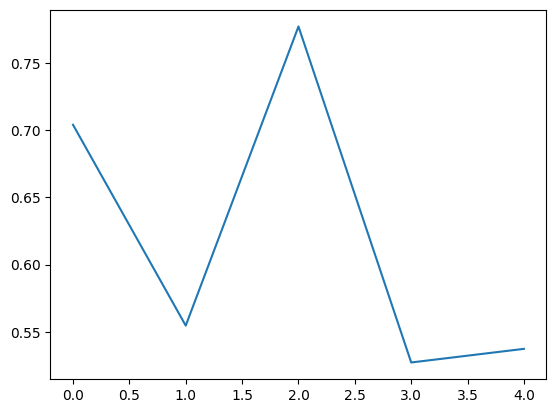

In [33]:
import matplotlib.pyplot as plt
print(len(train_losses))
plt.plot(train_losses)

# Evaluating on Test Set

In [21]:
import os
os.chdir('/content/drive/MyDrive/Brainhack')

In [22]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.5/592.5 kB 16.2 MB/s eta 0:00:00


In [31]:
import torch
import cv2
import csv
import pandas as pd
import gdown
#from reID.model import SiameseNetwork
#from reID.inference import infer
#from reID.transforms import Transforms
import os
from ultralytics import YOLO
from PIL import Image

yolo_url = "https://drive.google.com/file/d/1-YNxQ1EORYLcKVnKC1V5GZSB6aov0Ivn/view?usp=sharing"
yolo_output = "best.pt"
#gdown.download( yolo_url, yolo_output, quiet=False)
yolo_model = YOLO('/content/drive/MyDrive/Brainhack/OD_model2.pt') #loading trained YOLO

reid_model = network

''' if loading from local
reid_model = SiameseNetwork()
reid_url = "https://drive.google.com/file/d/1MSUtLHjFWsUU6KIoI59C1fl-DmpSRU27/view?usp=sharing"
reid_output = "/content/drive/MyDrive/Brainhack/reid_model.pt" #loading trained reID
#gdown.download(reid_url, reid_output, quiet=False)
reid_model.load_state_dict(torch.load(reid_output))
reid_model.cuda()
'''
submission_list = []
test_dir = "/content/test_images"
suspect_dir = "/content/suspects/content/drive/Shareddrives/ZINDI Data Science/ADPL/Competition Data/CV/Data Prep/Test (0-1599)/merged/crops"

def detect(image_name):
    """
    
    """
    #print(image_name)
    image_path = os.path.join(test_dir, image_name)
    suspect_path = os.path.join(suspect_dir, image_name)
    objects_detected = []
    #print(suspect_path)
    img = cv2.imread(image_path)
    #print(f'hi {type(img)}')
    suspect = cv2.imread(suspect_path)
    #print(img)
    #suspect = Image.fromarray(suspect)
    results = yolo_model(img)
    #print(f'results {results[0]}')
    boxes = results[0].boxes
    

    for box in boxes:
      #t = Transforms()
      confidence = box.conf.tolist() #confidence level
      x1n,y1n,x2n,y2n = torch.squeeze(box.xyxyn).tolist()
      x1,y1,x2,y2 = torch.squeeze(box.xyxy).tolist()
      # [[1,2], [2,3]] -> (2,2)
      #print(int(x1),int(y1),int(x2),y2)
      plushie = img[int(y1):int(y2), int(x1):int(x2)] 
      
      #plushie = Image.fromarray(plushie)
      
      #print(type(suspect))
      
      #print(plushie.shape())           
      classification, _ = infer(reid_model, plushie, suspect, transform)
      objects_detected.append({'Image_ID': image_name[:-4], 'class': classification.item(), 'confidence': confidence[0], 'ymin':y1n, 'xmin':x1n, 'ymax':y2n, 'xmax':x2n })
    return objects_detected


for image in os.listdir(test_dir):
        submit = detect(image)
        for obj in submit:
            submission_list.append(obj)

submission_df = pd.DataFrame(submission_list)
submission_df.to_csv('submission2.csv', index=False)



# with open('', 'w', newline='') as f:
#     writer = csv.writer(f)


0: 384x640 3 toys, 27.1ms
Speed: 1.7ms preprocess, 27.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 toys, 25.8ms
Speed: 2.5ms preprocess, 25.8ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 toy, 25.7ms
Speed: 2.3ms preprocess, 25.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 toys, 25.9ms
Speed: 2.5ms preprocess, 25.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 toys, 26.3ms
Speed: 2.0ms preprocess, 26.3ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 toys, 25.9ms
Speed: 1.8ms preprocess, 25.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 toy, 25.9ms
Speed: 1.9ms preprocess, 25.9ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 toys, 25.9ms
Speed: 1.8ms preprocess, 25.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x64

# BOILERPLATE CODE

In [ ]:
def predict_image(model, target, img, transform=None, device=torch.device('cpu')):
    xb, xb2 = transform(target).unsqueeze(0), transform(img).unsqueeze(0) # Convert to batch of 1
    model.eval()
    yb = model(xb.to(device), xb2.to(device))
    return yb


In [ ]:

!git clone https://github.com/ultralytics/yolov5.git

In [ ]:
!pip install -r yolov5/requirements.txt

In [ ]:
import pandas as pd

bb_ann = {"Image_ID": [], "class": [], "confidence": [], "ymin": [], "xmin": [], 
          "ymax": [], "xmax": []}


yolo_repo_path = 'yolov5'
yolo_model_path = '/content/drive/MyDrive/BH/best.pt'
reid_model_path = "/content/drive/MyDrive/BH/model.pth"

yolo_model = torch.hub.load(yolo_repo_path, 'custom', path=yolo_model_path, source='local')

reid_model = SiameseNetwork()
reid_model.load_state_dict(torch.load(reid_model_path, map_location=torch.device('cuda')))

test_dir = "test_images"
suspect_dir = "suspects/content/drive/Shareddrives/ZINDI Data Science/ADPL/Competition Data/CV/Data Prep/Test (0-1599)/merged/crops"

reid_transforms = Transforms()

def detect_objects(image_name):
    image_path = os.path.join(test_dir, image_name)
    suspect_path = os.path.join(suspect_dir, image_name)

    img = cv2.imread(image_path)
    suspect = cv2.imread(suspect_path)
    
    img_h, img_w = img.shape[:2]

    # Perform object detection
    results = yolo_model(img)

    # Print the detected objects with their classes, confidence scores, and bounding box coordinates
    for result in results.xyxy[0].tolist():
        class_id = int(result[5])
        confidence = result[4]
        x1, y1, x2, y2 = result[:4]
        plushie = img[int(y1):int(y2), int(x1):int(x2)]
        match_confidence = float(predict_image(reid_model, suspect, plushie, transform=reid_transforms))
        plushie_class = 1 if match_confidence > 0 else 0

        bb_ann["Image_ID"].append(image_name[:-4])
        bb_ann["class"].append(plushie_class) 
        bb_ann["confidence"].append(confidence)
        bb_ann["ymin"].append(y1 / img_h)
        bb_ann["xmin"].append(x1 / img_w)
        bb_ann["ymax"].append(y2 / img_h)
        bb_ann["xmax"].append(x2 / img_w)
        
    if not results.xyxy[0].tolist():
        bb_ann["Image_ID"].append(image_name[:-4])
        bb_ann["class"].append(0) 
        bb_ann["confidence"].append(0)
        bb_ann["ymin"].append(0)
        bb_ann["xmin"].append(0)
        bb_ann["ymax"].append(0)
        bb_ann["xmax"].append(0)



for i, image_name in enumerate(os.listdir(test_dir)[:10]):
    detect_objects(image_name)



df = pd.DataFrame.from_dict(bb_ann)
df.to_csv("results.csv", index=False)

In [ ]:
df.head(10)

In [ ]:
print("hello")